__Opći podatci__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructor = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

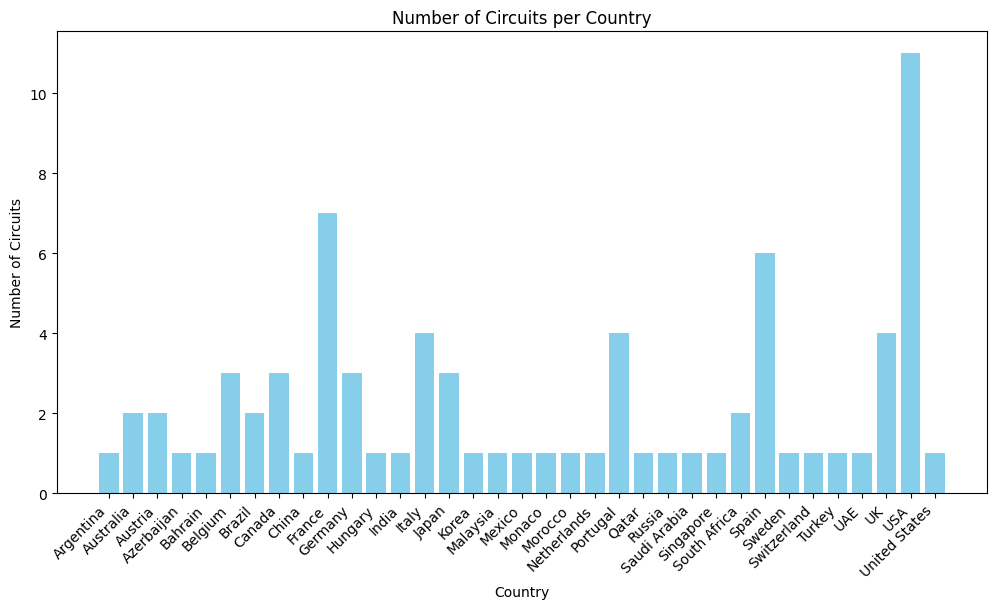

In [43]:
circuits_by_country = circuits.groupby('country')['circuitId'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(circuits_by_country['country'], circuits_by_country['circuitId'], color='skyblue')
plt.title('Number of Circuits per Country')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.xticks(rotation=45, ha='right') 

plt.show()

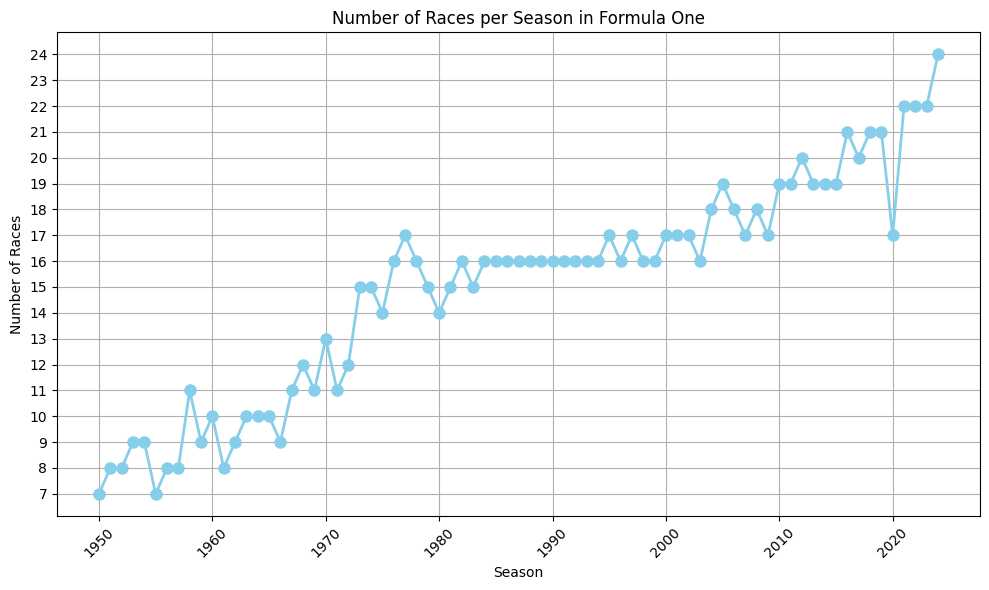

In [3]:
df = pd.read_csv('formula_one_seasons.csv')

plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['Races'], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races per Season in Formula One')
plt.xticks(rotation=45)
plt.grid(True)

plt.yticks(range(int(df['Races'].min()), int(df['Races'].max()) + 1))
plt.tight_layout()

plt.show()


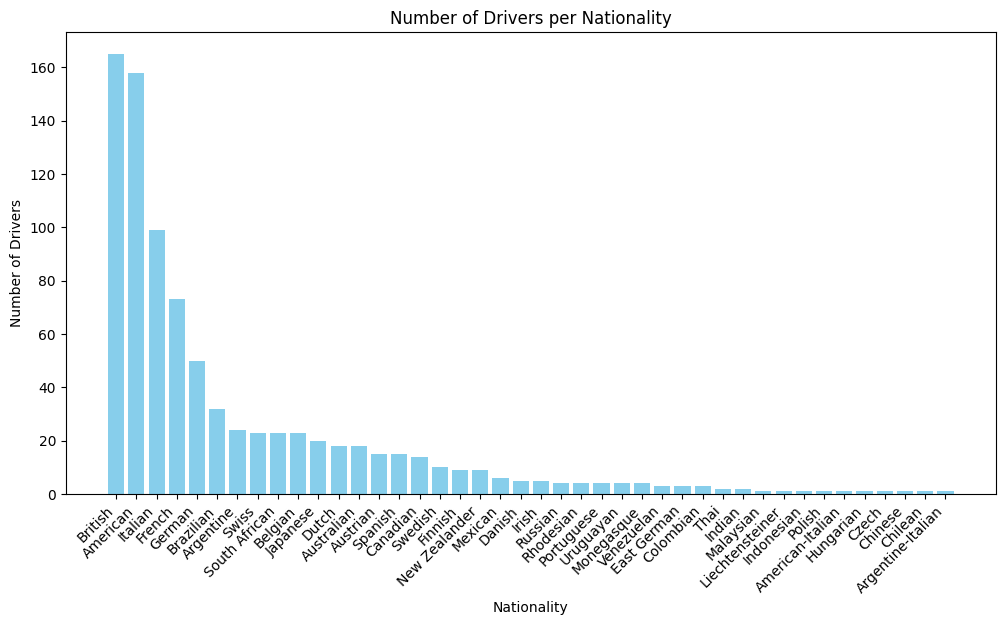

In [44]:
drivers_by_nationality = drivers.groupby('nationality')['driverId'].count().reset_index()

drivers_by_nationality = drivers_by_nationality.sort_values(by='driverId', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(drivers_by_nationality['nationality'], drivers_by_nationality['driverId'], color='skyblue')
plt.title('Number of Drivers per Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45, ha='right')

plt.show()

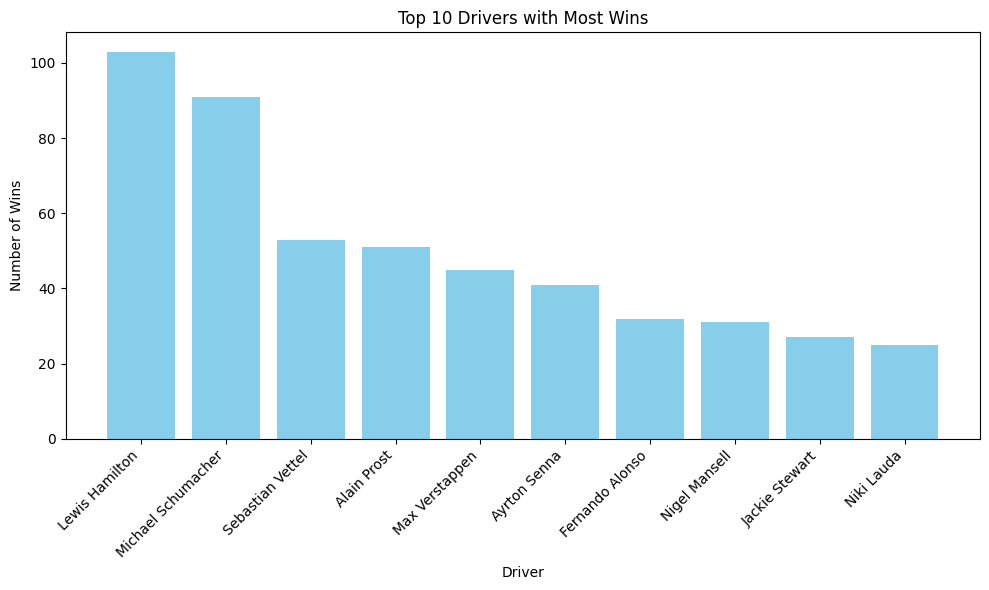

In [4]:
driver_wins = (
    drivers[['driverId', 'forename', 'surname']]
    .merge(results[['driverId', 'positionOrder']], how='left', on='driverId')
    .query("positionOrder == 1") 
    .groupby(['driverId', 'forename', 'surname'])['positionOrder']
    .count()
    .reset_index(name='wins')
)

top_10_drivers = driver_wins.sort_values(by='wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_drivers['forename'] + ' ' + top_10_drivers['surname'], top_10_drivers['wins'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.title('Top 10 Drivers with Most Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

__Statistika za sezonu 2023__

In [1]:
import ergast_py
import csv

e = ergast_py.Ergast()

In [35]:
import csv
from unidecode import unidecode
import ergast_py

def read_csv_file(file_path):
    seasons_and_races = []

    with open(file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            season = int(row['Season'])
            races = int(row['Races'])

            if 2005 <= season <= 2023:
                seasons_and_races.append({'season': season, 'races': races})

    return seasons_and_races

e = ergast_py.Ergast()

csv_file_path = 'formula_one_seasons.csv'
seasons_and_races = read_csv_file(csv_file_path)

race_data = []

for entry in seasons_and_races:
    season = entry['season']
    races = entry['races']
    print(f"Processing Season: {season}")

    races_to_exclude = set()
    if season == 2022:
        races_to_exclude.update([2, 11, 12])
    elif season == 2023:
        races_to_exclude.update([13, 18])

    for race_number in range(1, races + 1):
        if race_number not in races_to_exclude:
            print(f"  Processing Race: {race_number}")

            race_results = e.season(season).round(race_number).get_results()

            for result in race_results[0].results:
                driver_name = f"{result.driver.given_name} {result.driver.family_name}"
                constructor_name = result.constructor.name if result.constructor else "N/A"

                driver_name_ascii = unidecode(driver_name)
                constructor_name_ascii = unidecode(constructor_name)

                race_data.append({
                    'Season': season,
                    'Round_No': race_results[0].round_no,
                    'Position': result.position,
                    'Number': result.number,
                    'Driver': driver_name_ascii,
                    'Constructor': constructor_name_ascii,
                    'Laps': result.laps,
                    'Grid': result.grid,
                    'Time': result.time,
                    'Status': result.status,
                    'Points': result.points,
                })

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)

    writer.writeheader()

    for data_row in race_data:
        writer.writerow(data_row)

print(f"Data has been written to {csv_file_path}")

Processing Season: 2005
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
  Processing Race: 19
Processing Season: 2006
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
Processing Season: 2007
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Proc

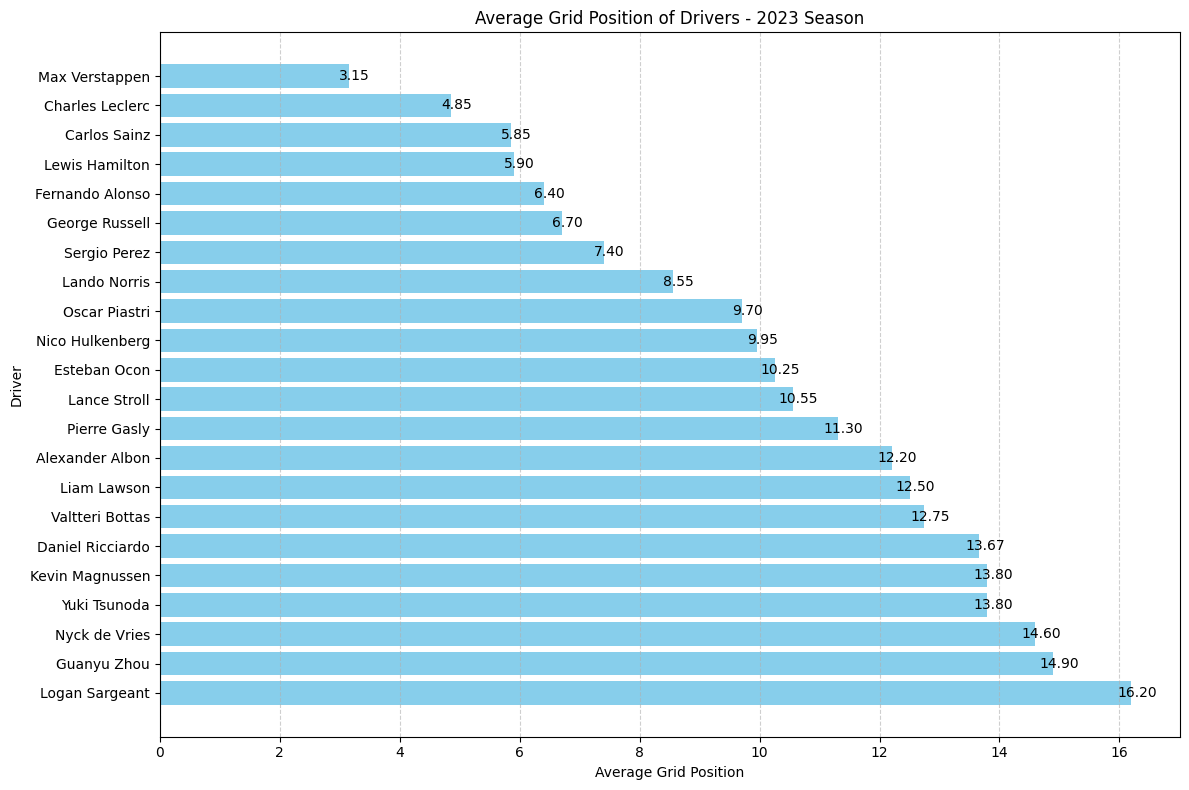

In [9]:
import csv
import matplotlib.pyplot as plt

def calculate_average_grid(data):
    driver_avg_grid = {}

    for entry in data:
        driver_name = entry['Driver']
        grid_position = entry['Grid']

        if driver_name not in driver_avg_grid:
            driver_avg_grid[driver_name] = {'TotalGrid': 0, 'TotalRaces': 0}

        if grid_position != 'N/A':
            driver_avg_grid[driver_name]['TotalGrid'] += int(grid_position)
            driver_avg_grid[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_grid.items():
        avg_grid = stats['TotalGrid'] / stats['TotalRaces']
        driver_avg_grid[driver]['AverageGrid'] = avg_grid

    return driver_avg_grid

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_grid = calculate_average_grid(data_from_csv)

sorted_drivers = sorted(driver_average_grid.items(), key=lambda x: x[1]['AverageGrid'], reverse=True)

driver_names = [driver for driver, stats in sorted_drivers]
average_grid_positions = [stats['AverageGrid'] for driver, stats in sorted_drivers]

plt.figure(figsize=(12, 8))
bars = plt.barh(driver_names, average_grid_positions, color='skyblue')
plt.xlabel('Average Grid Position')
plt.ylabel('Driver')
plt.title('Average Grid Position of Drivers - 2023 Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar, value in zip(bars, average_grid_positions):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

C:\Users\goran\AppData\Local\Temp\ipykernel_3932\2499360671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grid', y='Driver', data=df, palette='YlGnBu', saturation=0.75, order=df.groupby('Driver')['Grid'].mean().sort_values().index)


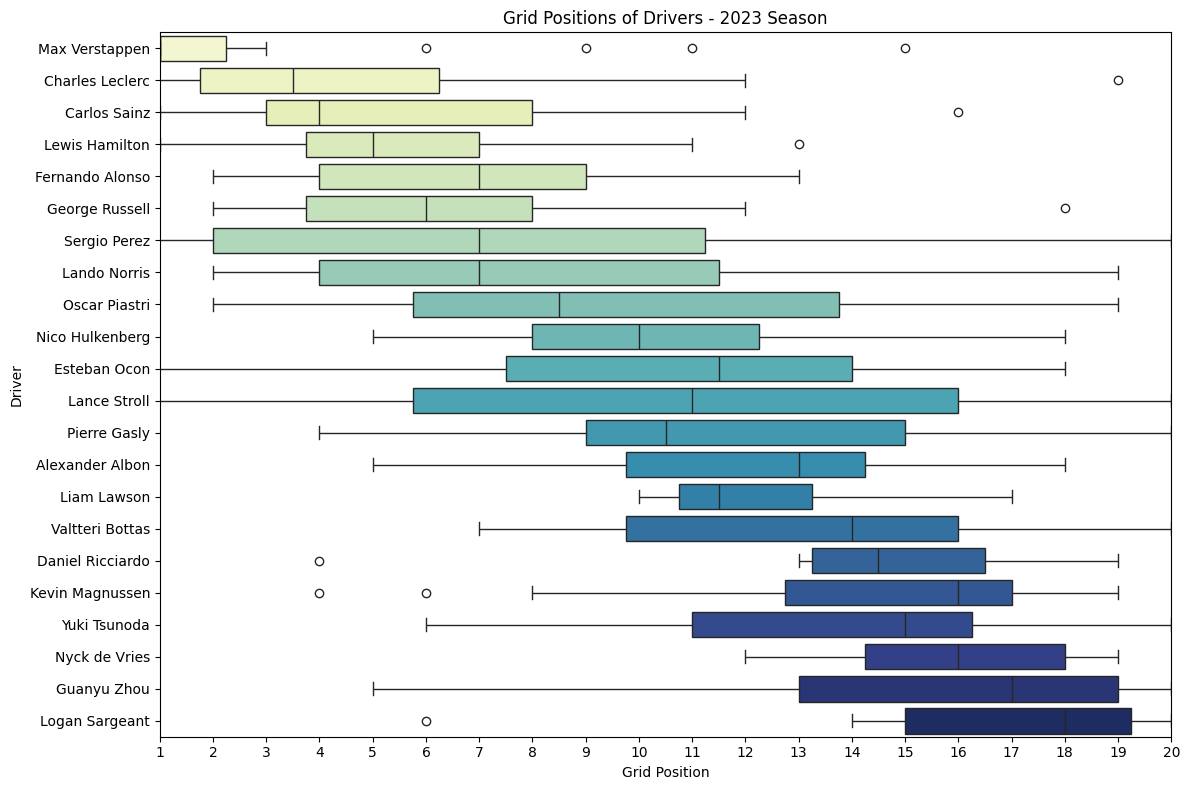

In [15]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

df = pd.DataFrame(data_from_csv)

df['Grid'] = pd.to_numeric(df['Grid'], errors='coerce')

plt.figure(figsize=(12, 8))

sns.boxplot(x='Grid', y='Driver', data=df, palette='YlGnBu', saturation=0.75, order=df.groupby('Driver')['Grid'].mean().sort_values().index)

plt.xlim(1, 20)

plt.xticks(range(1, 21, 1))

plt.xlabel('Grid Position')
plt.ylabel('Driver')
plt.title('Grid Positions of Drivers - 2023 Season')

plt.tight_layout()
plt.show()


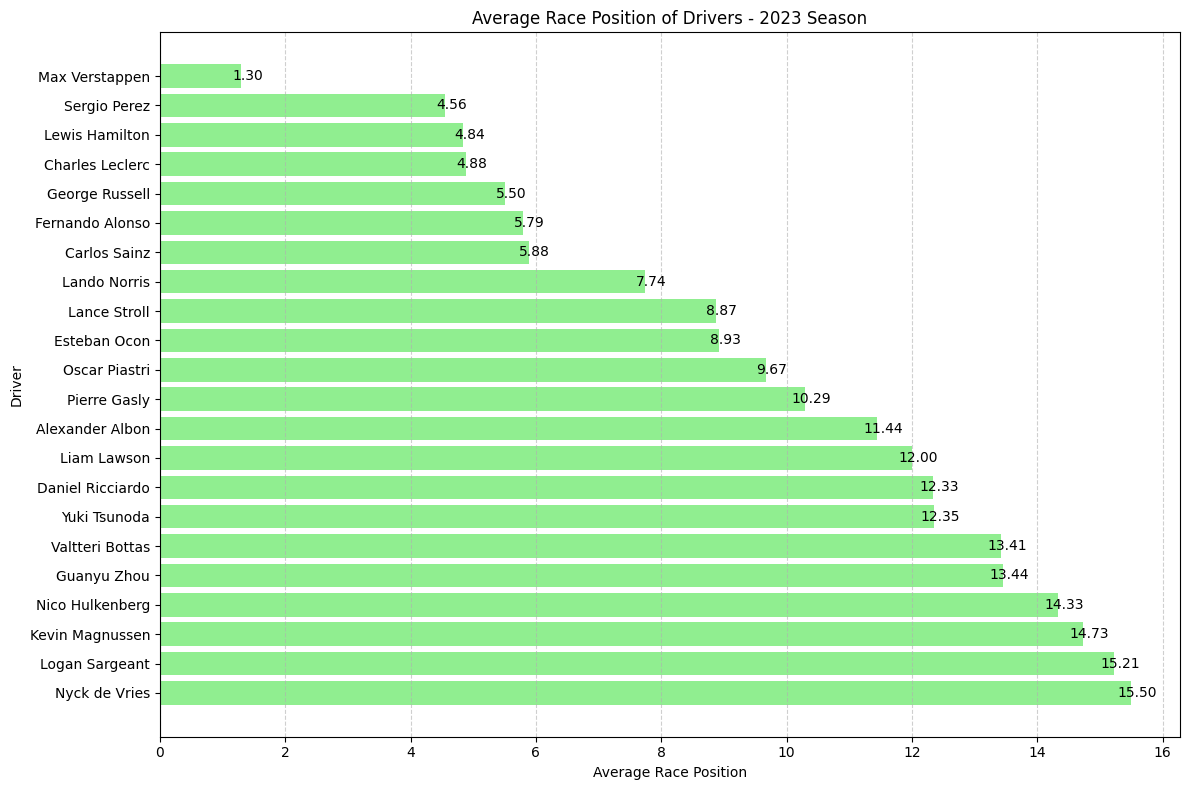

In [11]:
import csv
import matplotlib.pyplot as plt

def calculate_average_position(data):
    driver_avg_position = {}

    for entry in data:
        driver_name = entry['Driver']
        race_position = entry['Position']
        race_status = entry['Status']

        if driver_name not in driver_avg_position:
            driver_avg_position[driver_name] = {'TotalPosition': 0, 'TotalRaces': 0}

        if race_status in ('1', '11', '12'):
            driver_avg_position[driver_name]['TotalPosition'] += int(race_position)
            driver_avg_position[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_position.items():
        avg_position = stats['TotalPosition'] / stats['TotalRaces']
        driver_avg_position[driver]['AveragePosition'] = avg_position

    return driver_avg_position

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_position = calculate_average_position(data_from_csv)

sorted_drivers = sorted(driver_average_position.items(), key=lambda x: x[1]['AveragePosition'], reverse=True)

driver_names = [driver for driver, stats in sorted_drivers]
average_positions = [stats['AveragePosition'] for driver, stats in sorted_drivers]

plt.figure(figsize=(12, 8))
bars = plt.barh(driver_names, average_positions, color='lightgreen')
plt.xlabel('Average Race Position')
plt.ylabel('Driver')
plt.title('Average Race Position of Drivers - 2023 Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar, value in zip(bars, average_positions):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

C:\Users\goran\AppData\Local\Temp\ipykernel_3932\3864010453.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Driver', data=df, palette='YlGnBu', saturation=0.75, order=df.groupby('Driver')['Position'].mean().sort_values().index, legend=False)


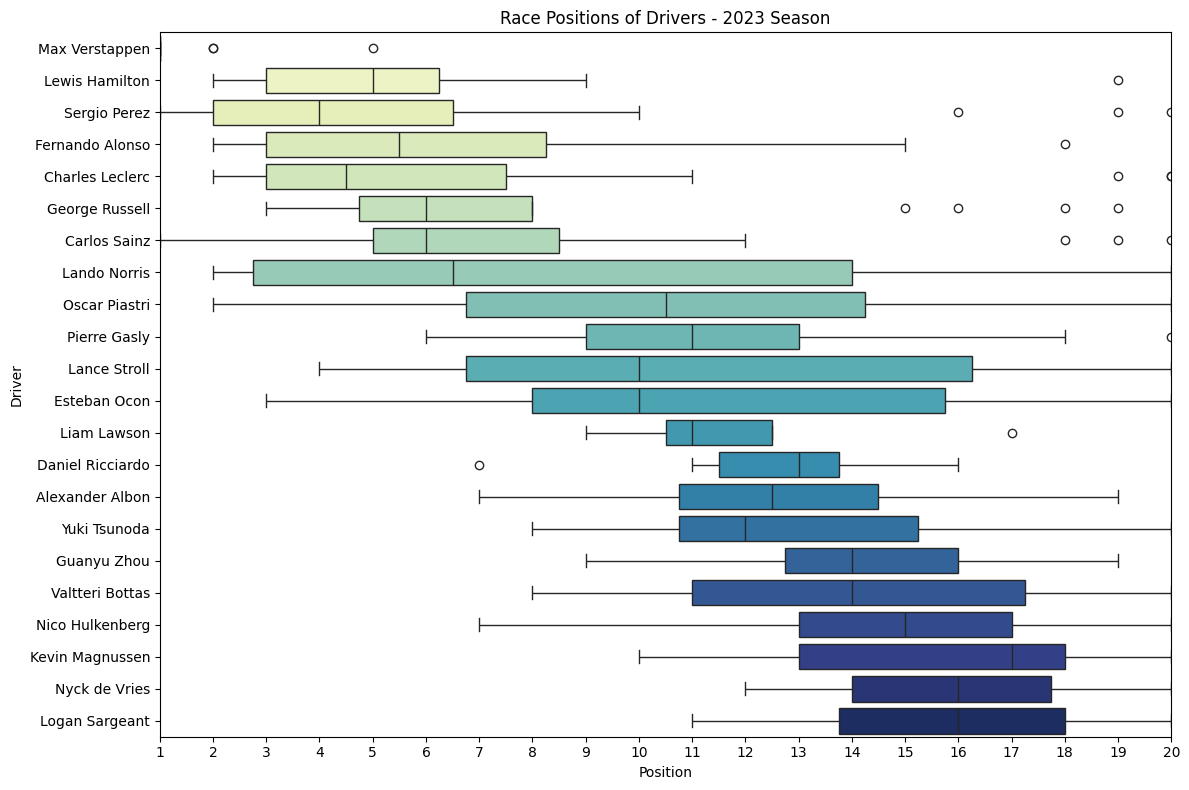

In [21]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

df = pd.DataFrame(data_from_csv)

df['Position'] = pd.to_numeric(df['Position'], errors='coerce')

plt.figure(figsize=(12, 8))

sns.boxplot(x='Position', y='Driver', data=df, palette='YlGnBu', saturation=0.75, order=df.groupby('Driver')['Position'].mean().sort_values().index, legend=False)

plt.xlim(1, 20)

plt.xticks(range(1, 21, 1))

plt.xlabel('Position')
plt.ylabel('Driver')
plt.title('Race Positions of Drivers - 2023 Season')

plt.tight_layout()
plt.show()


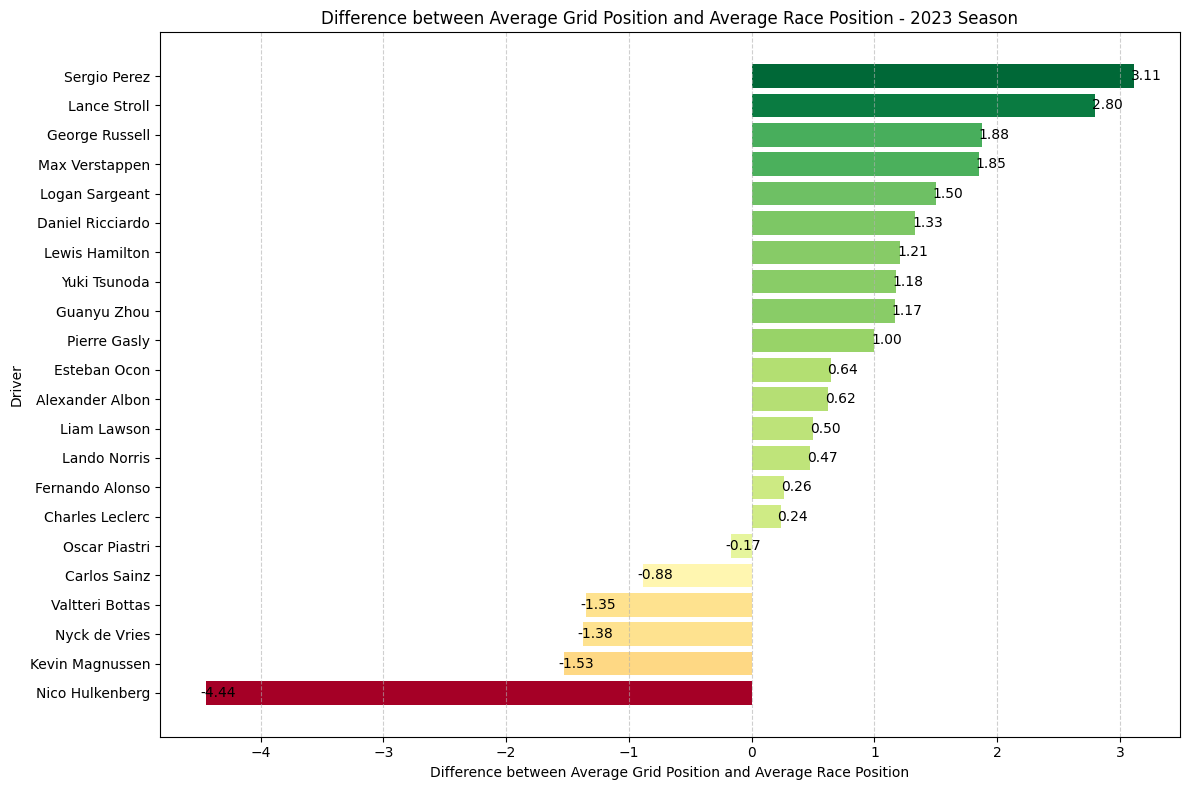

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_position(data):
    driver_avg_position = {}

    for entry in data:
        driver_name = entry['Driver']
        race_position = entry['Position']
        grid_position = entry['Grid']
        race_status = entry['Status']

        if driver_name not in driver_avg_position:
            driver_avg_position[driver_name] = {'TotalPosition': 0, 'TotalGrid': 0, 'TotalRaces': 0}

        if race_status in ('1', '11', '12'):
            driver_avg_position[driver_name]['TotalPosition'] += int(race_position)
            driver_avg_position[driver_name]['TotalGrid'] += int(grid_position)
            driver_avg_position[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_position.items():
        avg_position = stats['TotalPosition'] / stats['TotalRaces']
        avg_grid = stats['TotalGrid'] / stats['TotalRaces']

        diff_position_grid = avg_grid - avg_position

        driver_avg_position[driver]['DifferencePositionGrid'] = diff_position_grid

    return driver_avg_position

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_position = calculate_average_position(data_from_csv)

sorted_drivers = sorted(driver_average_position.items(), key=lambda x: x[1]['DifferencePositionGrid'])

driver_names = [driver for driver, stats in sorted_drivers]
difference_positions = [stats['DifferencePositionGrid'] for driver, stats in sorted_drivers]

cmap = plt.get_cmap('RdYlGn')
normalize = plt.Normalize(min(difference_positions), max(difference_positions))
colors = [cmap(normalize(diff)) for diff in difference_positions]

plt.figure(figsize=(12, 8))
bars = plt.barh(driver_names, difference_positions, color=colors)
plt.xlabel('Difference between Average Grid Position and Average Race Position')
plt.ylabel('Driver')
plt.title('Difference between Average Grid Position and Average Race Position - 2023 Season')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar, value, color in zip(bars, difference_positions, colors):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [34]:
import csv
from unidecode import unidecode
import ergast_py

def read_csv_file(file_path):
    seasons_and_races = []

    with open(file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            season = int(row['Season'])
            races = int(row['Races'])

            if 2005 <= season <= 2023:
                seasons_and_races.append({'season': season, 'races': races})

    return seasons_and_races

e = ergast_py.Ergast()

csv_file_path = 'formula_one_seasons.csv'
seasons_and_races = read_csv_file(csv_file_path)

driver_data = []

for entry in seasons_and_races:
    season = entry['season']
    races = entry['races']
    print(f"Processing Season: {season}")

    for race_number in range(1, races + 1):
        print(f"  Processing Race: {race_number}")

        qualy_results = e.season(season).round(race_number).get_qualifyings()

        for result in qualy_results:
            for driver_result in result.qualifying_results:
                driver_name = f"{driver_result.driver.given_name} {driver_result.driver.family_name}"
                constructor_name = driver_result.constructor.name if driver_result.constructor else "N/A"
                qualifying_times = [
                    driver_result.qual_1,
                    driver_result.qual_2,
                    driver_result.qual_3,
                ]

                qualifying_times = [time for time in qualifying_times if time is not None]

                if qualifying_times:
                    fastest_time = min(qualifying_times)

                    driver_name_ascii = unidecode(driver_name)
                    constructor_name_ascii = unidecode(constructor_name)

                    driver_data.append({
                        'Season': season,
                        'Round_No': result.round_no,
                        'Driver_Name': driver_name_ascii,
                        'Constructor_Name': constructor_name_ascii,
                        'Fastest_Qualifying_Time': fastest_time,
                    })

csv_file_path = 'qualifying_data_all_seasons.csv'
csv_columns = ['Season', 'Round_No', 'Driver_Name', 'Constructor_Name', 'Fastest_Qualifying_Time']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)

    writer.writeheader()

    for data_row in driver_data:
        writer.writerow(data_row)

print(f"Data has been written to {csv_file_path}")

Processing Season: 2005
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
  Processing Race: 19
Processing Season: 2006
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
Processing Season: 2007
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Proc

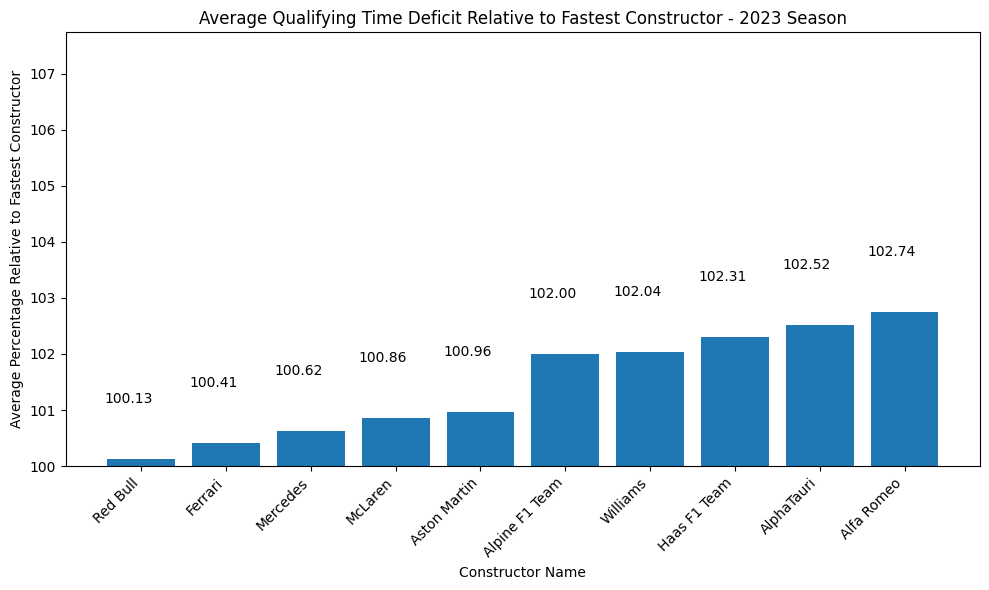

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

df_2023 = df[df['Season'] == 2023].copy()

df_2023['Fastest_Qualifying_Time'] = pd.to_timedelta(df_2023['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

average_percentage_data = []

for round_no in df_2023['Round_No'].unique():
    filtered_df = df_2023[df_2023['Round_No'] == round_no].copy()

    fastest_time = filtered_df['Fastest_Qualifying_Time'].min()

    result_df = filtered_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    average_percentage_data.append(result_df[['Constructor_Name', 'Percentage_Relative_to_Fastest']])

average_percentage_df = pd.concat(average_percentage_data, ignore_index=True)

average_percentage_df = average_percentage_df.groupby('Constructor_Name')['Percentage_Relative_to_Fastest'].mean().reset_index()

average_percentage_df = average_percentage_df.sort_values(by='Percentage_Relative_to_Fastest')


plt.figure(figsize=(10, 6))
bars = plt.bar(average_percentage_df['Constructor_Name'], average_percentage_df['Percentage_Relative_to_Fastest'])
plt.xlabel('Constructor Name')
plt.ylabel('Average Percentage Relative to Fastest Constructor')
plt.title('Average Qualifying Time Deficit Relative to Fastest Constructor - 2023 Season')
plt.xticks(rotation=45, ha='right')

plt.ylim(100, max(average_percentage_df['Percentage_Relative_to_Fastest']) + 5)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{bar.get_height():.2f}', ha='center', color='black')

plt.tight_layout()
plt.show()

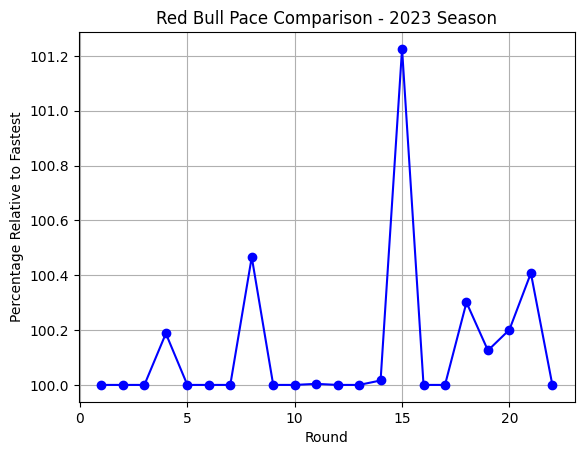

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

red_bull_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    red_bull_result = result_df[result_df['Constructor_Name'] == 'Red Bull']

    red_bull_percentages.append(red_bull_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, red_bull_percentages, marker='o', linestyle='-', color='blue')
plt.title('Red Bull Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()

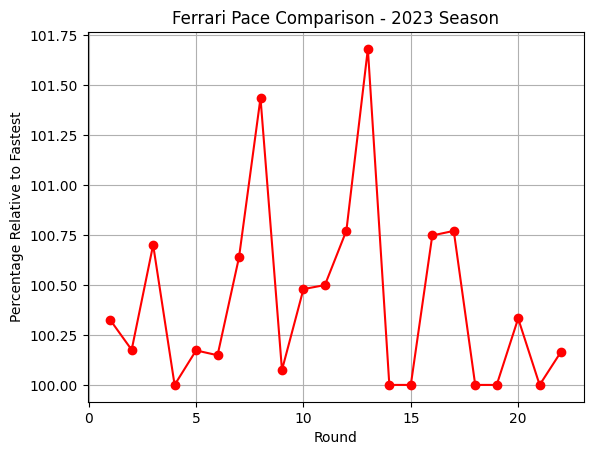

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

ferrari_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    ferrari_result = result_df[result_df['Constructor_Name'] == 'Ferrari']

    ferrari_percentages.append(ferrari_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, ferrari_percentages, marker='o', linestyle='-', color='red')
plt.title('Ferrari Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()

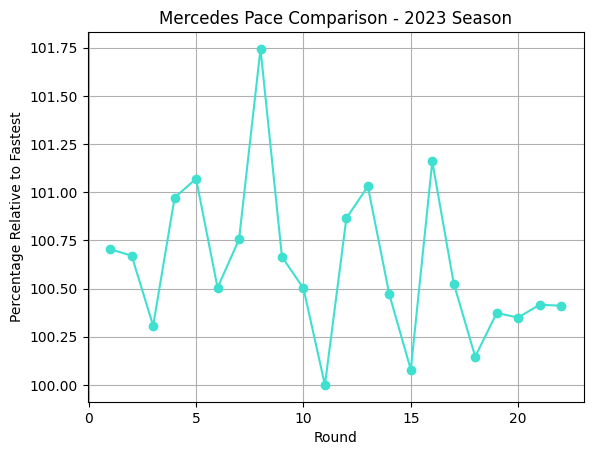

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

mercedes_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    mercedes_result = result_df[result_df['Constructor_Name'] == 'Mercedes']

    mercedes_percentages.append(mercedes_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, mercedes_percentages, marker='o', linestyle='-', color='turquoise')
plt.title('Mercedes Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()

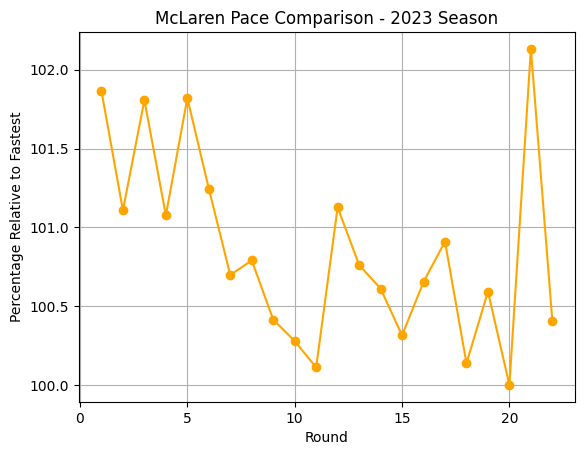

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

mclaren_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    mclaren_result = result_df[result_df['Constructor_Name'] == 'McLaren']

    mclaren_percentages.append(mclaren_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, mclaren_percentages, marker='o', linestyle='-', color='orange')
plt.title('McLaren Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()

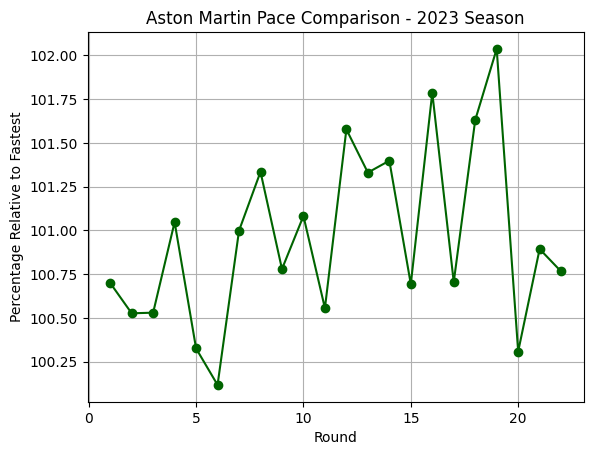

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

aston_martin_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    aston_martin_result = result_df[result_df['Constructor_Name'] == 'Aston Martin']

    aston_martin_percentages.append(aston_martin_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, aston_martin_percentages, marker='o', linestyle='-', color='darkgreen')
plt.title('Aston Martin Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()

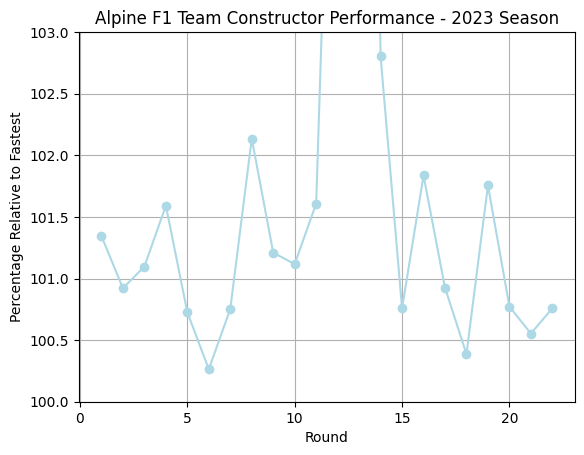

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

alpine_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    alpine_result = result_df[result_df['Constructor_Name'] == 'Alpine F1 Team']

    alpine_percentages.append(alpine_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, alpine_percentages, marker='o', linestyle='-', color='lightblue')
plt.title('Alpine F1 Team Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)

plt.ylim(100, 103)

plt.show()


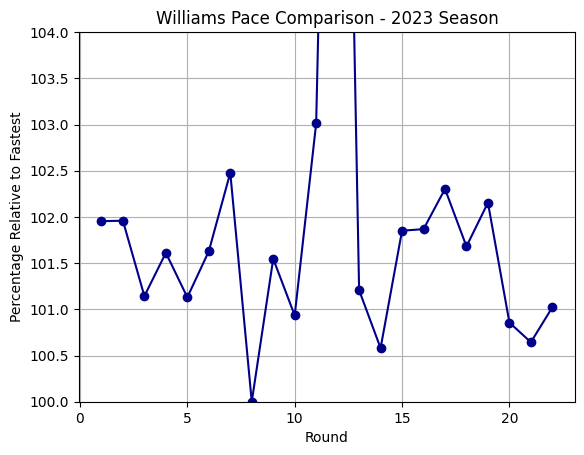

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

williams_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    williams_result = result_df[result_df['Constructor_Name'] == 'Williams']

    williams_percentages.append(williams_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, williams_percentages, marker='o', linestyle='-', color='darkblue')
plt.title('Williams Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)

plt.ylim(100, 104)

plt.show()

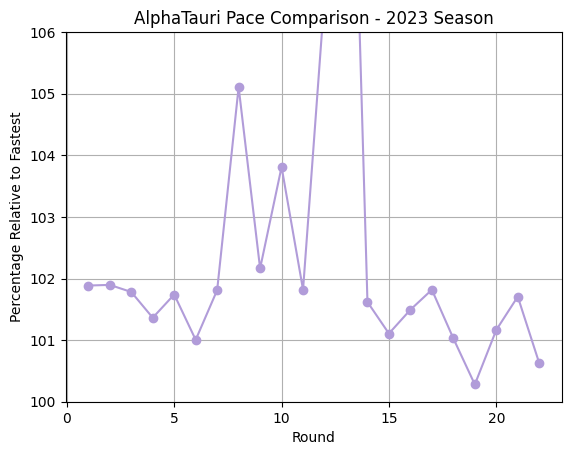

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

alphatauri_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    alphatauri_result = result_df[result_df['Constructor_Name'] == 'AlphaTauri']

    alphatauri_percentages.append(alphatauri_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, alphatauri_percentages, marker='o', linestyle='-', color='#B19CD9')
plt.title('AlphaTauri Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)

plt.ylim(100, 106)

plt.show()

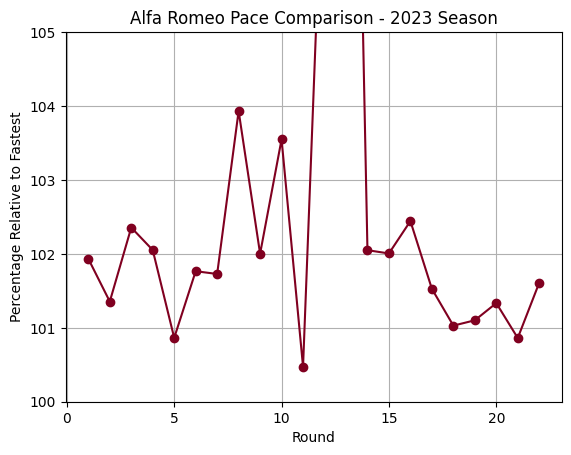

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

alfa_romeo_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    alfa_romeo_result = result_df[result_df['Constructor_Name'] == 'Alfa Romeo']

    alfa_romeo_percentages.append(alfa_romeo_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, alfa_romeo_percentages, marker='o', linestyle='-', color='#800020')  
plt.title('Alfa Romeo Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)

plt.ylim(100, 105)

plt.show()

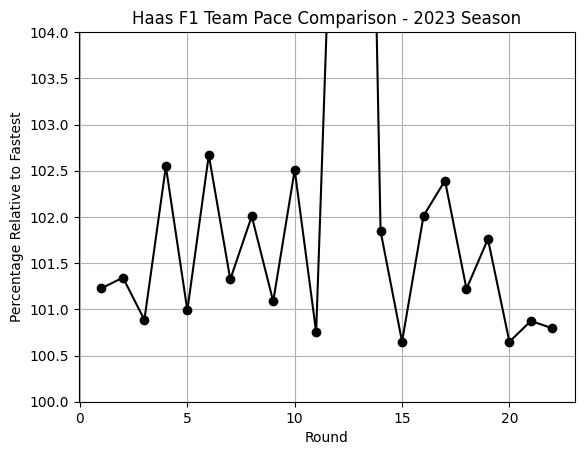

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

haas_percentages = []

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    haas_result = result_df[result_df['Constructor_Name'] == 'Haas F1 Team']

    haas_percentages.append(haas_result['Percentage_Relative_to_Fastest'].values[0])

plt.plot(unique_rounds, haas_percentages, marker='o', linestyle='-', color='black')
plt.title('Haas F1 Team Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)

plt.ylim(100, 104)

plt.show()

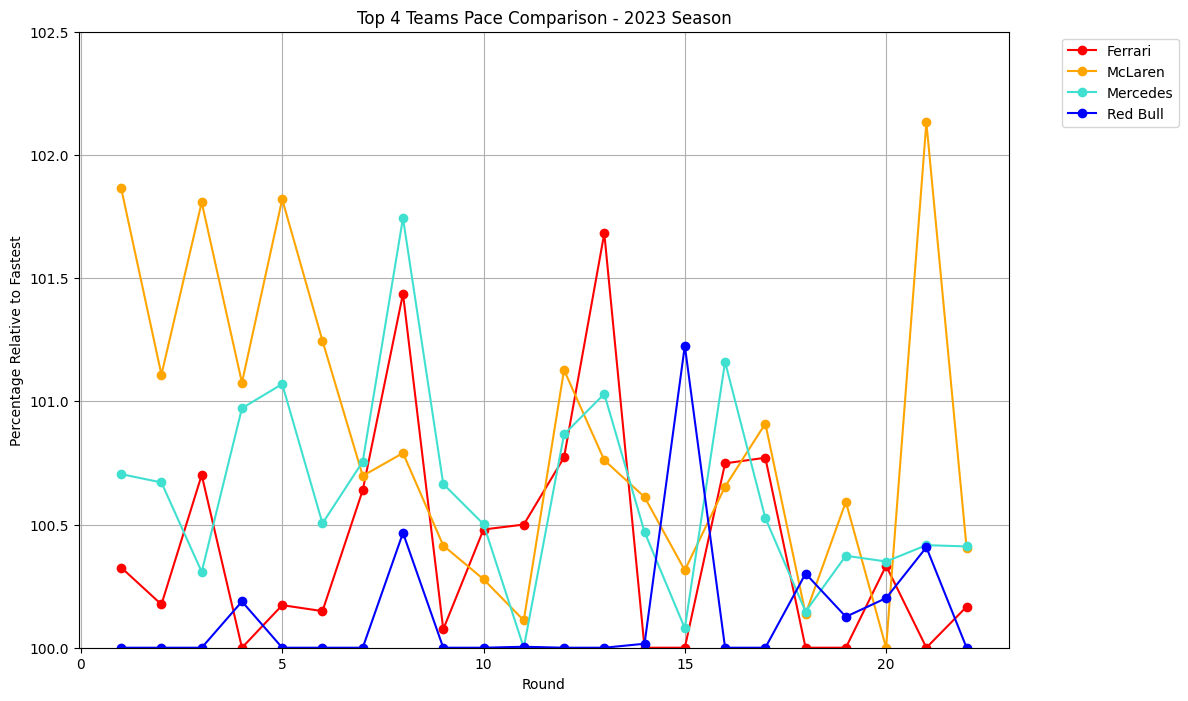

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

season_2023_df = df[df['Season'] == 2023].copy()

season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

unique_rounds = season_2023_df['Round_No'].unique()

constructor_colors = {
    'Red Bull': 'blue',
    'Ferrari': 'red',
    'Mercedes': 'turquoise',
    'McLaren': 'orange'
}

selected_constructors = ['Red Bull', 'Ferrari', 'Mercedes', 'McLaren']

all_constructor_percentages = {}

for round_no in unique_rounds:
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    fastest_time = round_df['Fastest_Qualifying_Time'].min()
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    for constructor, percentage in zip(result_df['Constructor_Name'], result_df['Percentage_Relative_to_Fastest']):
        if constructor in selected_constructors:
            if constructor not in all_constructor_percentages:
                all_constructor_percentages[constructor] = []
            all_constructor_percentages[constructor].append(percentage)

plt.figure(figsize=(12, 8))

for constructor, percentages in all_constructor_percentages.items():
    color = constructor_colors.get(constructor, 'gray')
    plt.plot(unique_rounds, percentages, marker='o', linestyle='-', label=constructor, color=color)

plt.ylim(100, 102.5)

plt.title('Top 4 Teams Pace Comparison - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

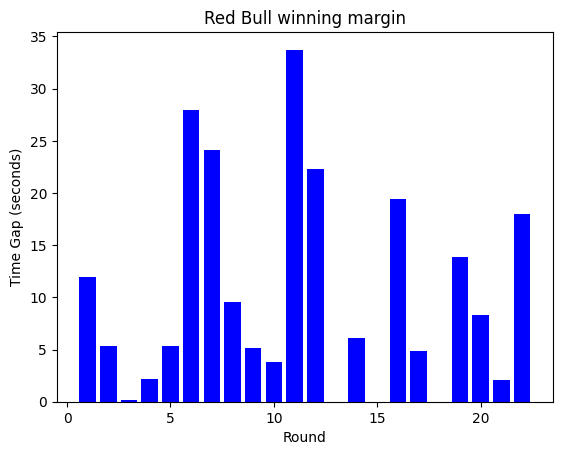

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'race_results_all_seasons_excluded.csv'
df = pd.read_csv(file_path)

df_2023 = df[df['Season'] == 2023]

rounds = []
time_gaps = []

for round_no in df_2023['Round_No'].unique():
    round_data = df_2023[df_2023['Round_No'] == round_no]

    if round_data.iloc[0]['Constructor'] == 'Red Bull':
        round_data_sorted = round_data.sort_values(by='Position')

        first_place_time = round_data_sorted.iloc[0]['Time']
        second_place_time = round_data_sorted.iloc[1]['Time']

        first_place_time = pd.to_timedelta(first_place_time).total_seconds() * 1000
        second_place_time = pd.to_timedelta(second_place_time).total_seconds() * 1000

        gap_in_ms = second_place_time - first_place_time

        gap_in_seconds = gap_in_ms / 1000

        rounds.append(round_no)
        time_gaps.append(gap_in_seconds)

plt.bar(rounds, time_gaps, color='blue')
plt.xlabel('Round')
plt.ylabel('Time Gap (seconds)')
plt.title('Red Bull winning margin')
plt.show()


__Predikcija poretka za 2024. sezonu__ 

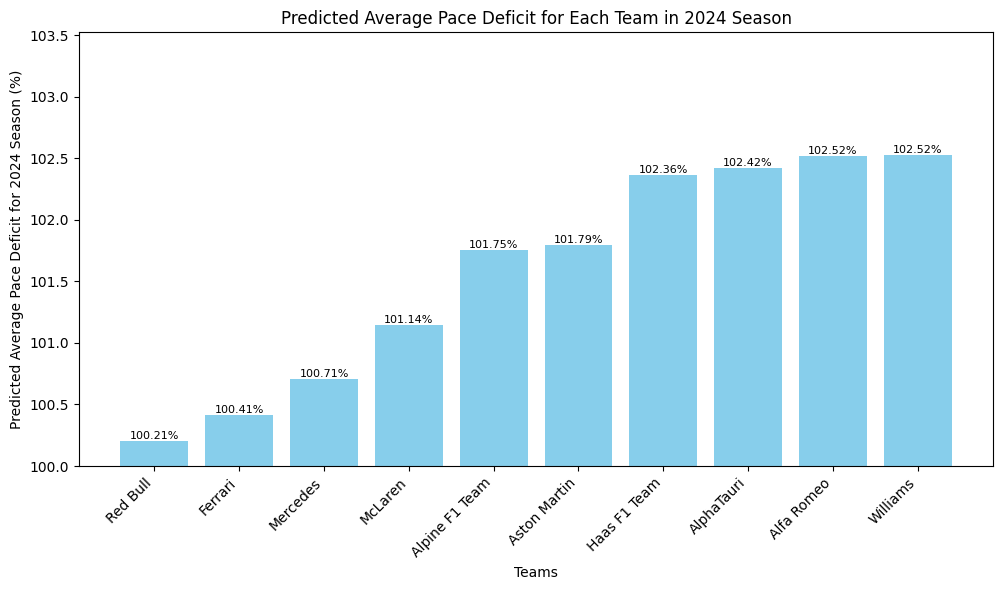

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('qualifying_data_all_seasons.csv')

df['Fastest_Qualifying_Time'] = pd.to_timedelta(df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

df['Constructor_Name'] = df['Constructor_Name'].replace({
    'Toro Rosso': 'AlphaTauri',
    'Renault': 'Alpine F1 Team',
    'Sauber': 'Alfa Romeo',
    'Racing Point': 'Aston Martin',
    'Force India': 'Aston Martin'
})

overall_fastest_data = []

for season in range(2018, 2024):
    season_df = df[df['Season'] == season].copy()

    for round_no in season_df['Round_No'].unique():
        round_df = season_df[season_df['Round_No'] == round_no].copy()
        fastest_time = round_df['Fastest_Qualifying_Time'].min()
        overall_fastest_data.append({'Season': season, 'Round_No': round_no, 'Overall_Fastest_Time': fastest_time})

overall_fastest_df = pd.DataFrame(overall_fastest_data)

average_pace_deficit_data = []

repetitions_factor = {
    2023: 30,
    2022: 20,
    2021: 4,
    2020: 2,
    2019: 1,
    2018: 1
}

for season in range(2018, 2024):
    season_df = df[df['Season'] == season].copy()

    total_rounds = season_df['Round_No'].nunique()
    rounds_per_part = int(np.ceil(total_rounds / 3))

    for constructor_name in season_df['Constructor_Name'].unique():
        constructor_df = season_df[season_df['Constructor_Name'] == constructor_name].copy()

        average_percentage_data = []

        repetitions = repetitions_factor.get(season, 1)

        for _ in range(repetitions):
            for part in range(3):
                start_round = part * rounds_per_part + 1
                end_round = min((part + 1) * rounds_per_part, total_rounds)

                part_df = constructor_df[constructor_df['Round_No'].between(start_round, end_round)].copy()

                for round_no in part_df['Round_No'].unique():
                    round_df = part_df[part_df['Round_No'] == round_no].copy()

                    overall_fastest_time = overall_fastest_df[
                        (overall_fastest_df['Season'] == season) & (overall_fastest_df['Round_No'] == round_no)][
                        'Overall_Fastest_Time'].values[0]

                    constructor_round_df = round_df.copy()

                    if not constructor_round_df.empty:
                        fastest_constructor_time = constructor_round_df['Fastest_Qualifying_Time'].min()
                        pace_deficit_percentage = (fastest_constructor_time / overall_fastest_time) * 100
                        average_percentage_data.append(
                            {'Constructor_Name': constructor_name, 'Percentage_Relative_to_Fastest': pace_deficit_percentage,
                             'Season': season})

        if average_percentage_data:
            average_percentage_df = pd.DataFrame(average_percentage_data)
            average_pace_deficit_data.append(average_percentage_df)

average_pace_deficit_df = pd.concat(average_pace_deficit_data, ignore_index=True)

overall_average_pace_deficits = average_pace_deficit_df.groupby('Constructor_Name')['Percentage_Relative_to_Fastest'].mean()

adjusted_deficits = {}

for constructor_name in overall_average_pace_deficits.index:
    adjusted_deficits[constructor_name] = [overall_average_pace_deficits[constructor_name]]

    for i in range(1, len(average_pace_deficit_df)):
        relative_change = average_pace_deficit_df.loc[i, 'Percentage_Relative_to_Fastest'] - \
                          average_pace_deficit_df.loc[i - 1, 'Percentage_Relative_to_Fastest']
        adjusted_deficit = adjusted_deficits[constructor_name][-1] + relative_change
        adjusted_deficit = max(100.0, adjusted_deficit)
        adjusted_deficits[constructor_name].append(adjusted_deficit)

predicted_deficits_2024 = {constructor_name: deficits[-1] - 1.0 for constructor_name, deficits in adjusted_deficits.items()}

sorted_predicted_deficits_2024 = dict(sorted(predicted_deficits_2024.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_predicted_deficits_2024.keys(), sorted_predicted_deficits_2024.values(), color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Predicted Average Pace Deficit for 2024 Season (%)')
plt.title('Predicted Average Pace Deficit for Each Team in 2024 Season')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom',
             fontsize=8, color='black')

plt.tight_layout()
plt.ylim(100, max(sorted_predicted_deficits_2024.values()) + 1)
plt.show()
